# 제비 데이터 분석

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.Train_data

In [158]:
swallow_o_1 = pd.read_csv("./data/sample_data/data_1.txt", sep="\t", encoding='cp949', index_col=0)
swallow_o_1.head()

,First,Quality_1,Second,Quality_2,Type,Longitude,Latitude,ElevAngle
Index,,,,,,,,
0,2023-06-08 10:53:48,9,2023-06-08 20:18:48,9,Midnight,125.690,26.006,-6.0
1,2023-06-08 20:18:48,9,2023-06-09 10:49:48,9,Midday,126.214,25.105,-6.0
2,2023-06-09 10:49:48,9,2023-06-09 20:17:48,9,Midnight,126.363,25.306,-6.0
3,2023-06-09 20:17:48,9,2023-06-10 10:49:48,9,Midday,126.388,25.223,-6.0
4,2023-06-10 10:49:48,9,2023-06-10 20:28:48,9,Midnight,125.038,22.915,-6.0


In [159]:
swallow_o_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 0 to 692
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   First      693 non-null    object 
 1   Quality_1  693 non-null    int64  
 2   Second     693 non-null    object 
 3   Quality_2  693 non-null    int64  
 4   Type       693 non-null    object 
 5   Longitude  693 non-null    float64
 6   Latitude   614 non-null    float64
 7   ElevAngle  693 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 48.7+ KB


In [160]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # 지구의 반지름 (미터)
    if lat1 == np.nan or lat2 == np.nan or lon1 == np.nan or lon2 == np.nan:
        return np.nan

    R = 6371000  

    # 위도와 경도를 라디안으로 변환
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    # Haversine 공식 계산
    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # 거리 계산
    distance = R * c
    return distance / 1000 ## m to km

In [161]:
swallow_o_1_c = swallow_o_1
swallow_o_1_c

,First,Quality_1,Second,Quality_2,Type,Longitude,Latitude,ElevAngle
Index,,,,,,,,
0,2023-06-08 10:53:48,9,2023-06-08 20:18:48,9,Midnight,125.690,26.006,-6.0
1,2023-06-08 20:18:48,9,2023-06-09 10:49:48,9,Midday,126.214,25.105,-6.0
2,2023-06-09 10:49:48,9,2023-06-09 20:17:48,9,Midnight,126.363,25.306,-6.0
3,2023-06-09 20:17:48,9,2023-06-10 10:49:48,9,Midday,126.388,25.223,-6.0
4,2023-06-10 10:49:48,9,2023-06-10 20:28:48,9,Midnight,125.038,22.915,-6.0
...,...,...,...,...,...,...,...,...
688,2024-05-19 10:29:48,9,2024-05-19 20:27:48,9,Midnight,126.932,21.556,-6.0
689,2024-05-19 20:27:48,9,2024-05-20 10:41:48,9,Midday,125.440,24.422,-6.0
690,2024-05-20 10:41:48,9,2024-05-20 20:18:48,9,Midnight,126.572,26.435,-6.0


In [162]:
list_temp = []

for i in range(swallow_o_1.shape[0]-2):
    list_temp.append(haversine(swallow_o_1.iloc[i]['Latitude'], swallow_o_1.iloc[i]['Longitude'], swallow_o_1.iloc[i+1]['Latitude'], swallow_o_1.iloc[i+1]['Longitude']))  ## index 1 ~ index 691 까지

len(list_temp)
temp = pd.Series(list_temp, name="이동 거리(km)")

In [163]:
swallow_o_1_c = swallow_o_1.drop(index=0, axis=0)
swallow_o_1.drop(index=swallow_o_1.shape[0]-1, inplace=True)
# swallow_o_1.reset_index(inplace=True)
swallow_o_1_c.reset_index(inplace=True)
swallow_o_1.drop(columns=['ElevAngle', 'Type'], inplace=True)

In [164]:
# swallow_o_1_c.drop(columns='Index', inplace=True)
# swallow_o_1.drop(columns='Index', inplace=True)

swallow_o_1.tail()

,First,Quality_1,Second,Quality_2,Longitude,Latitude
Index,,,,,,
687,2024-05-18 20:23:48,9,2024-05-19 10:29:48,9,127.425,22.678
688,2024-05-19 10:29:48,9,2024-05-19 20:27:48,9,126.932,21.556
689,2024-05-19 20:27:48,9,2024-05-20 10:41:48,9,125.440,24.422
690,2024-05-20 10:41:48,9,2024-05-20 20:18:48,9,126.572,26.435
691,2024-05-20 20:18:48,9,2024-05-21 13:21:48,9,106.582,50.002


In [165]:
swallow_o_1['Longitude_difference'] = swallow_o_1['Longitude'] - swallow_o_1_c['Longitude']
swallow_o_1['Latitude_difference'] = swallow_o_1['Latitude'] - swallow_o_1_c['Latitude']
swallow_o_1.tail()

,First,Quality_1,Second,Quality_2,Longitude,Latitude,Longitude_difference,Latitude_difference
Index,,,,,,,,
687,2024-05-18 20:23:48,9,2024-05-19 10:29:48,9,127.425,22.678,0.493,1.122
688,2024-05-19 10:29:48,9,2024-05-19 20:27:48,9,126.932,21.556,1.492,-2.866
689,2024-05-19 20:27:48,9,2024-05-20 10:41:48,9,125.440,24.422,-1.132,-2.013
690,2024-05-20 10:41:48,9,2024-05-20 20:18:48,9,126.572,26.435,19.990,-23.567
691,2024-05-20 20:18:48,9,2024-05-21 13:21:48,9,106.582,50.002,23.365,30.442


In [166]:
swallow_o_1.drop(index=0, inplace=True)

In [167]:
swallow_o_1.reset_index(inplace=True)

In [168]:
swallow_o_1 = pd.concat([swallow_o_1, temp], axis=1)
swallow_o_1.drop(columns=['Index', 'Quality_1', 'Second', "Quality_2"], inplace=True)

In [169]:
swallow_o_1

,First,Longitude,Latitude,Longitude_difference,Latitude_difference,이동 거리(km)
0,2023-06-08 20:18:48,126.214,25.105,-0.149,-0.201,113.138979
1,2023-06-09 10:49:48,126.363,25.306,-0.025,0.083,26.911826
2,2023-06-09 20:17:48,126.388,25.223,1.350,2.308,9.565448
3,2023-06-10 10:49:48,125.038,22.915,-1.275,2.284,290.937574
4,2023-06-10 20:28:48,126.313,20.631,-1.900,-3.275,286.061348
...,...,...,...,...,...,...
686,2024-05-18 20:23:48,127.425,22.678,0.493,1.122,286.513064
687,2024-05-19 10:29:48,126.932,21.556,1.492,-2.866,134.700630
688,2024-05-19 20:27:48,125.440,24.422,-1.132,-2.013,353.380386
689,2024-05-20 10:41:48,126.572,26.435,19.990,-23.567,251.043299


In [170]:
swallow_o_1.dropna(inplace=True)
swallow_o_1_c.dropna(inplace=True)

In [171]:
swallow_o_1.reset_index(inplace=True)
swallow_o_1_c.reset_index(inplace=True)

In [172]:
mean_1 = np.mean(swallow_o_1['Latitude'])
std_1 = np.std(swallow_o_1['Latitude'])
mean_2 = np.mean(swallow_o_1['Longitude'])
std_2 = np.std(swallow_o_1['Longitude'])

swallow_o_1['Latitdue_zlevel'] = (swallow_o_1['Latitude'] - mean_1) / std_1
swallow_o_1['Longitdue_zlevel'] = (swallow_o_1['Longitude'] - mean_2) / std_2

In [173]:
swallow_o_1['class'] = np.ones(swallow_o_1.shape[0])

In [176]:
swallow_o_1.drop(columns='index', inplace=True)

In [48]:
swallow_o_1.drop(columns='class', inplace=True)

In [177]:
swallow_o_1

,First,Longitude,Latitude,Longitude_difference,Latitude_difference,이동 거리(km),Latitdue_zlevel,Longitdue_zlevel,class
0,2023-06-08 20:18:48,126.214,25.105,-0.149,-0.201,113.138979,0.548632,0.802112,1.0
1,2023-06-09 10:49:48,126.363,25.306,-0.025,0.083,26.911826,0.564653,0.832133,1.0
2,2023-06-09 20:17:48,126.388,25.223,1.350,2.308,9.565448,0.558037,0.837170,1.0
3,2023-06-10 10:49:48,125.038,22.915,-1.275,2.284,290.937574,0.374082,0.565173,1.0
4,2023-06-10 20:28:48,126.313,20.631,-1.900,-3.275,286.061348,0.192040,0.822059,1.0
...,...,...,...,...,...,...,...,...,...
594,2024-05-18 20:23:48,127.425,22.678,0.493,1.122,286.513064,0.355192,1.046103,1.0
595,2024-05-19 10:29:48,126.932,21.556,1.492,-2.866,134.700630,0.265765,0.946774,1.0
596,2024-05-19 20:27:48,125.440,24.422,-1.132,-2.013,353.380386,0.494195,0.646167,1.0
597,2024-05-20 10:41:48,126.572,26.435,19.990,-23.567,251.043299,0.654638,0.874242,1.0


In [155]:
swallow_o_1.to_csv("./data/sample_data/data_1.csv", sep=',', na_rep='NaN')

In [157]:
!cp ./data/sample_data/data_1.csv ../../../../../mnt/c/Users/khj01/OneDrive/문서/data/data_1.csv

###  재가공 데이터 분석

In [178]:
swallow_o_1.head()

,First,Longitude,Latitude,Longitude_difference,Latitude_difference,이동 거리(km),Latitdue_zlevel,Longitdue_zlevel,class
0,2023-06-08 20:18:48,126.214,25.105,-0.149,-0.201,113.138979,0.548632,0.802112,1.0
1,2023-06-09 10:49:48,126.363,25.306,-0.025,0.083,26.911826,0.564653,0.832133,1.0
2,2023-06-09 20:17:48,126.388,25.223,1.350,2.308,9.565448,0.558037,0.837170,1.0
3,2023-06-10 10:49:48,125.038,22.915,-1.275,2.284,290.937574,0.374082,0.565173,1.0
4,2023-06-10 20:28:48,126.313,20.631,-1.900,-3.275,286.061348,0.192040,0.822059,1.0


In [89]:
swallow_o_1_n = swallow_o_1.to_numpy()
swallow_o_1_n[:, 3]

array([-0.5240000000000009, -0.1490000000000009, -0.025000000000005684,
       1.3500000000000085, -1.2750000000000057, -1.8999999999999915,
       1.0989999999999895, 0.5990000000000038, 0.09900000000000375,
       0.5990000000000038, 0.47399999999998954, -0.6509999999999962,
       0.09799999999999898, -1.2759999999999962, -0.652000000000001,
       1.222999999999999, -0.902000000000001, 0.597999999999999,
       0.09799999999999898, -0.777000000000001, 0.09799999999999898,
       0.2220000000000084, -0.277000000000001, -0.7770000000000152,
       2.473000000000013, 0.3469999999999942, 22.345, -0.777000000000001,
       -25.399, 0.3480000000000132, 1.597999999999999, 2.097999999999999,
       -1.0260000000000105, 0.2230000000000132, 0.722999999999999,
       0.22399999999998954, 57.21600000000001, -0.4270000000000067,
       -57.16799999999999, 1.4749999999999943, 0.8500000000000085,
       -1.7750000000000057, 0.2259999999999991, -1.649000000000001,
       -1.649000000000001, 2.1009

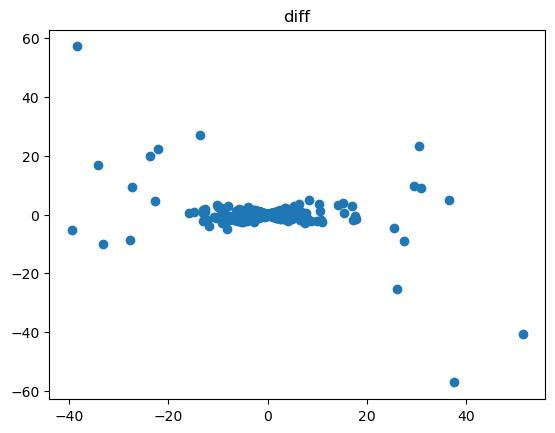

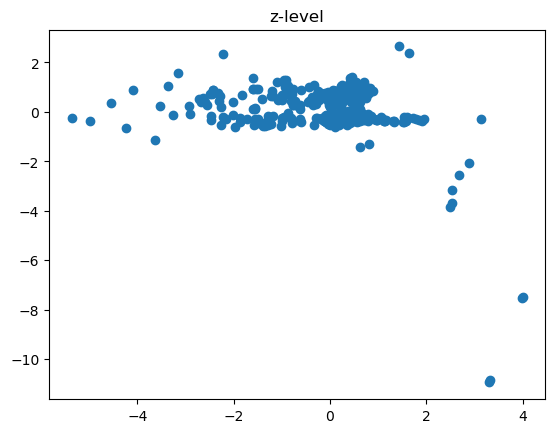

/home/hyungjookim/anaconda3/envs/tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hyungjookim/anaconda3/envs/tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hyungjookim/anaconda3/envs/tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hyungjookim/anaconda3/envs/tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


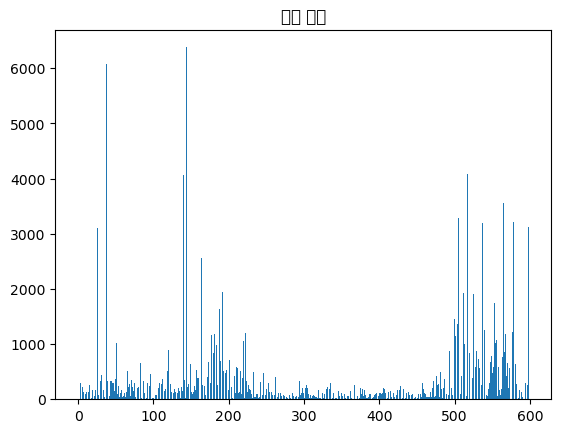

In [180]:
plt.scatter(swallow_o_1.iloc[:]['Latitude_difference'], swallow_o_1.iloc[:]['Longitude_difference'])
plt.title('diff')
plt.show()

plt.scatter(swallow_o_1.iloc[:]['Latitdue_zlevel'], swallow_o_1.iloc[:]['Longitdue_zlevel'])
plt.title('z-level')
plt.show()

plt.bar(swallow_o_1.index, swallow_o_1.iloc[:]['이동 거리(km)'])
plt.title('이동 거리')
plt.show()

In [38]:
rand_index = np.random.choice(range(swallow_o_1.shape[0]), 100, replace=False)
rand_index.sort()
rand_index

array([  2,   7,  14,  17,  21,  24,  27,  46,  52,  83,  89,  97, 102,
       107, 109, 112, 114, 119, 124, 132, 142, 147, 150, 159, 168, 173,
       178, 181, 186, 193, 196, 197, 212, 214, 227, 237, 241, 242, 246,
       248, 252, 255, 261, 267, 270, 276, 277, 285, 289, 300, 319, 320,
       328, 332, 337, 347, 350, 353, 366, 367, 371, 374, 389, 393, 407,
       409, 410, 425, 430, 434, 439, 444, 449, 452, 453, 456, 460, 465,
       471, 475, 476, 480, 482, 486, 492, 495, 499, 506, 512, 522, 535,
       548, 556, 569, 583, 591, 592, 594, 598, 603])

In [41]:
swallow_read = swallow_o_1.iloc[rand_index]

swallow_read.to_csv("./data/save_data/train_first.csv", sep=",", na_rep="NaN")

In [42]:
!cp ./data/save_data/train_first.csv ../../../../../mnt/c/Users/khj01/OneDrive/문서/data/train_first.csv

In [51]:
haversine(25.105, 126.214, 26.006, 125.690)

113.13897862241693

### 2.지도에 마크 찍기

In [16]:
%pip install folium

  Using cached branca-0.7.2-py3-none-any.whl.metadata (1.5 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
Using cached branca-0.7.2-py3-none-any.whl (25 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
import folium as fl

In [22]:
swallow_o_1.shape[0]

605

In [33]:
m = fl.Map(
    location=(swallow_o_1.iloc[0]['Latitude'], swallow_o_1.iloc[0]['Longitude']),
    zoom_start = 4
)

for i in range(swallow_o_1.shape[0]):
    fl.Marker(
        location=(swallow_o_1.iloc[i]['Latitude'], swallow_o_1.iloc[i]['Longitude']),
        popup=f"<div><p>{swallow_o_1.iloc[i]['First']}<p/><p>{swallow_o_1.iloc[i]['Longitude']}<p/><p>{swallow_o_1.iloc[i]['Latitude']}<p/></div>",
        tooltip=f"{swallow_o_1.iloc[i]['First']}",
    ).add_to(m)

In [28]:
m

In [34]:
m2 = fl.Map(
    location=(swallow_o_1.iloc[0]['Latitude'], swallow_o_1.iloc[0]['Longitude']),
    zoom_start = 4
)

temp = []

for i in range(swallow_o_1.shape[0]):
    temp.append((swallow_o_1.iloc[i]['Latitude'], swallow_o_1.iloc[i]['Longitude']))

fl.PolyLine(temp).add_to(m)

In [35]:
m2

## 2024-08-23, 10:19 PM 시작  -- ~

### todo list

- 위도, 경도차를 구해서 결측치 라벨링(결측치가 0, 일반 데이터가 1) *** 중요.  평균을 차한다던가 표준편차를 나눈다던가 하는 식으로 반드시 할것 실패해도 좋음 라벨링 성공만 하면 나머지는 금방 끝남
    - 펑균을 차한값, 표준편차를 나눈 값등등을 모두 활용한다면 좋지 않을까? - 2024/08/25 첨
#### 2024/08/24 - 좋은 아이디어
    - 두 데이터을 일자단위로 구분하여 두 데이터의 차를 구해고 이를 기반으로 라벨링
    - 차가 크면 둘다 삭제(train_data로 쓸꺼니까 상관 X)
    - 라벨링후 오차는 확인할 것(큰 오차가 남아있는 것만 아니면 상관)
    - 이후 이 데이터로 머신러닝 후 그 모델로 원본데이터 분석

#### 2024/08/25 - 굉장히 좋은 아이디어 - 차용, 이후 개발은 이 모델로
    - 일단 위,경도의 차를 모아놓은 데이터를 기반으로 0,1,2 (0은 확실한 결측데이터, 1은 확실하게 결측이 아닌 데이터, 2는 애매한 데이터) 구분
    - class 2는 날려버리고 남은 데이터로 이진분류 모델 훈련
    - 그 모델을 기반으로 다시 원본데이터 분류
    - 분류된 데이터를 기반으로 다시 모델 훈련
        - 그러나 이 과정에서 그대로 다시하면 똑같은 모델이 나올 것이 뻔하기에 일부 데이터는 랜덤히 삭제해서 훈련
        - 이 과정을 수~수십회 반복하면 괜찮은 모델이 나올 것이라고 예측

- 혹시 모를 null값 확인(확인은 끝, 그러나 필요해서 살려두는 중 - 추후 제거 예정 2024/08/25) -- 제거 끝(2024/08/28)


- 머신러닝 모델 정하기 (이부분은 뺄까 고민중 - 2024/08/25)  -- 트리 알고리즘으로 결정(2024/08/28)

#### 메모 - 2024/08/26
- 첫번째 모델과 두번째 모델을 충분히 분리할 것 -- 끝

- 전처리는 가능하면 수요일까지는 끝내자  -- 끝(2024/08/28)

## 2.test_data

In [191]:
swallow_o_2 = pd.read_csv("./data/sample_data/data_2.txt", sep='\t', encoding='cp949', index_col=0)
swallow_o_2.head()

,First,Quality_1,Second,Quality_2,Type,Longitude,Latitude,ElevAngle
Index,,,,,,,,
0,2023-06-09 02:18:53,9,2023-06-09 08:20:53,9,Midnight,-80.178,51.083,-6.0
1,2023-06-09 08:20:53,9,2023-06-10 10:43:53,9,Midday,36.730,-72.258,-6.0
2,2023-06-10 10:43:53,9,2023-06-10 20:08:53,9,Midnight,128.267,25.832,-6.0
3,2023-06-10 20:08:53,9,2023-06-11 10:48:53,9,Midday,127.667,26.747,-6.0
4,2023-06-11 10:48:53,9,2023-06-11 20:02:53,9,Midnight,128.442,27.907,-6.0


In [192]:
swallow_o_2.shape

(692, 8)

In [195]:
list_temp = []

for i in range(swallow_o_2.shape[0]-2):
    list_temp.append(haversine(swallow_o_2.iloc[i]['Latitude'], swallow_o_2.iloc[i]['Longitude'], swallow_o_2.iloc[i+1]['Latitude'], swallow_o_2.iloc[i+1]['Longitude']))  ## index 1 ~ index 691 까지

len(list_temp)
temp = pd.Series(list_temp, name="이동 거리(km)")
temp

0      16219.073406
1      12785.647254
2        118.023548
3        149.994348
4         88.540391
           ...     
685       15.682818
686      633.780693
687       13.800561
688       15.911647
689       94.135694
Name: 이동 거리(km), Length: 690, dtype: float64

In [196]:
swallow_o_2_c = swallow_o_2.drop(index=0, axis=0)
swallow_o_2.drop(index=691, inplace=True)
swallow_o_2_c.reset_index(inplace=True)

In [197]:
swallow_o_2.drop(columns=['ElevAngle', 'Type'], inplace=True)

In [198]:
swallow_o_2['Longitude_difference'] = swallow_o_2['Longitude'] - swallow_o_2_c['Longitude']
swallow_o_2['Latitude_difference'] = swallow_o_2['Latitude'] - swallow_o_2_c['Latitude']
swallow_o_2.tail()

,First,Quality_1,Second,Quality_2,Longitude,Latitude,Longitude_difference,Latitude_difference
Index,,,,,,,,
686,2024-05-17 11:07:20,9,2024-05-17 20:12:20,9,124.150,33.950,-3.005,5.091
687,2024-05-17 20:12:20,9,2024-05-18 10:43:20,9,127.155,28.859,-0.006,0.124
688,2024-05-18 10:43:20,9,2024-05-18 20:12:20,9,127.161,28.735,-0.006,0.143
689,2024-05-18 20:12:20,9,2024-05-19 10:43:20,9,127.167,28.592,0.368,0.782
690,2024-05-19 10:43:20,9,2024-05-19 20:15:20,9,126.799,27.810,19.117,-22.276


In [199]:
swallow_o_2.drop(index=0, inplace=True)

In [200]:
swallow_o_2.reset_index(inplace=True)

In [201]:
swallow_o_2 = pd.concat([swallow_o_2, temp], axis=1)
swallow_o_2.drop(columns=['Index', 'Quality_1', 'Second', "Quality_2"], inplace=True)

In [202]:
swallow_o_2

,First,Longitude,Latitude,Longitude_difference,Latitude_difference,이동 거리(km)
0,2023-06-09 08:20:53,36.730,-72.258,-91.537,-98.090,16219.073406
1,2023-06-10 10:43:53,128.267,25.832,0.600,-0.915,12785.647254
2,2023-06-10 20:08:53,127.667,26.747,-0.775,-1.160,118.023548
3,2023-06-11 10:48:53,128.442,27.907,0.474,-0.678,149.994348
4,2023-06-11 20:02:53,127.968,28.585,0.849,1.324,88.540391
...,...,...,...,...,...,...
685,2024-05-17 11:07:20,124.150,33.950,-3.005,5.091,15.682818
686,2024-05-17 20:12:20,127.155,28.859,-0.006,0.124,633.780693
687,2024-05-18 10:43:20,127.161,28.735,-0.006,0.143,13.800561
688,2024-05-18 20:12:20,127.167,28.592,0.368,0.782,15.911647


In [203]:
len(swallow_o_2)

690

In [206]:
swallow_o_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631 entries, 0 to 689
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   First                 631 non-null    object 
 1   Longitude             631 non-null    float64
 2   Latitude              631 non-null    float64
 3   Longitude_difference  631 non-null    float64
 4   Latitude_difference   631 non-null    float64
 5   이동 거리(km)             631 non-null    float64
dtypes: float64(5), object(1)
memory usage: 34.5+ KB


In [205]:
swallow_o_2.dropna(inplace=True)

In [208]:
swallow_o_2.reset_index(inplace=True)

In [209]:
swallow_o_2

,index,First,Longitude,Latitude,Longitude_difference,Latitude_difference,이동 거리(km)
0,0,2023-06-09 08:20:53,36.730,-72.258,-91.537,-98.090,16219.073406
1,1,2023-06-10 10:43:53,128.267,25.832,0.600,-0.915,12785.647254
2,2,2023-06-10 20:08:53,127.667,26.747,-0.775,-1.160,118.023548
3,3,2023-06-11 10:48:53,128.442,27.907,0.474,-0.678,149.994348
4,4,2023-06-11 20:02:53,127.968,28.585,0.849,1.324,88.540391
...,...,...,...,...,...,...,...
626,685,2024-05-17 11:07:20,124.150,33.950,-3.005,5.091,15.682818
627,686,2024-05-17 20:12:20,127.155,28.859,-0.006,0.124,633.780693
628,687,2024-05-18 10:43:20,127.161,28.735,-0.006,0.143,13.800561
629,688,2024-05-18 20:12:20,127.167,28.592,0.368,0.782,15.911647


In [212]:
swallow_o_2['class'] = np.ones(swallow_o_2.shape[0])

In [211]:
swallow_o_2.drop(columns='class', inplace=True)

In [213]:
swallow_o_2

,index,First,Longitude,Latitude,Longitude_difference,Latitude_difference,이동 거리(km),class
0,0,2023-06-09 08:20:53,36.730,-72.258,-91.537,-98.090,16219.073406,1.0
1,1,2023-06-10 10:43:53,128.267,25.832,0.600,-0.915,12785.647254,1.0
2,2,2023-06-10 20:08:53,127.667,26.747,-0.775,-1.160,118.023548,1.0
3,3,2023-06-11 10:48:53,128.442,27.907,0.474,-0.678,149.994348,1.0
4,4,2023-06-11 20:02:53,127.968,28.585,0.849,1.324,88.540391,1.0
...,...,...,...,...,...,...,...,...
626,685,2024-05-17 11:07:20,124.150,33.950,-3.005,5.091,15.682818,1.0
627,686,2024-05-17 20:12:20,127.155,28.859,-0.006,0.124,633.780693,1.0
628,687,2024-05-18 10:43:20,127.161,28.735,-0.006,0.143,13.800561,1.0
629,688,2024-05-18 20:12:20,127.167,28.592,0.368,0.782,15.911647,1.0


In [214]:
swallow_o_2.to_csv('./data/sample_data/data_2.csv', sep=',', na_rep='NaN')

In [215]:
!cp ./data/sample_data/data_2.csv ../../../../../mnt/c/Users/khj01/OneDrive/문서/data/data_2.csv

## sub. 데이터 초기 분석

In [ ]:
### 주의! 여기 건들면 위에꺼 다 무효화

In [ ]:
swallow_o_1 = pd.read_csv("./data/sample_data/data_1.txt", sep="\t", encoding='cp949', index_col=0)
swallow_o_2 = pd.read_csv("./data/sample_data/data_2.txt", sep="\t", encoding='cp949', index_col=0)

In [ ]:
swllow_o = pd.concat([swallow_o_1, swallow_o_2])
swllow_o.shape

In [ ]:
swllow_o.head()

In [ ]:
swllow_data = swllow_o.drop(columns=['ElevAngle', 'Type'])
swllow_data_n = swllow_data.to_numpy()
swllow_data_n[:, 5]

In [ ]:
root = "../original_data/"

plt.scatter(swllow_data_n[:, 5], swllow_data_n[:, 4])
plt.xlabel("Latitude")
plt.ylabel("LongiTude")
plt.show()
# plt.savefig(root + "산점도_결측치_제거되지_않은_위도_경도", dpi=300)